In [12]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

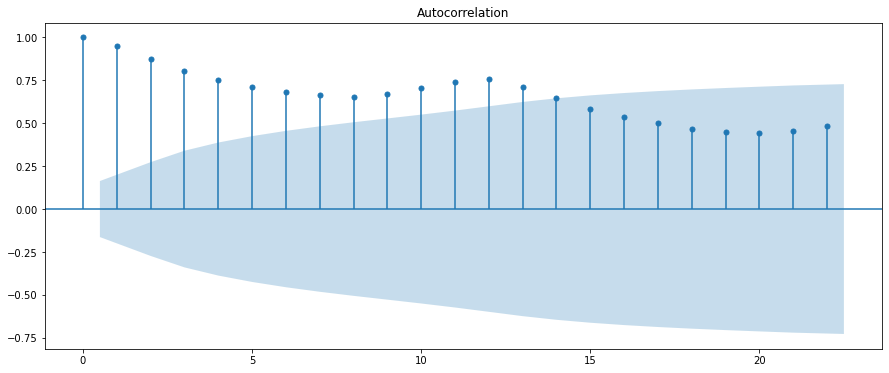

In [6]:
plot_acf(data);

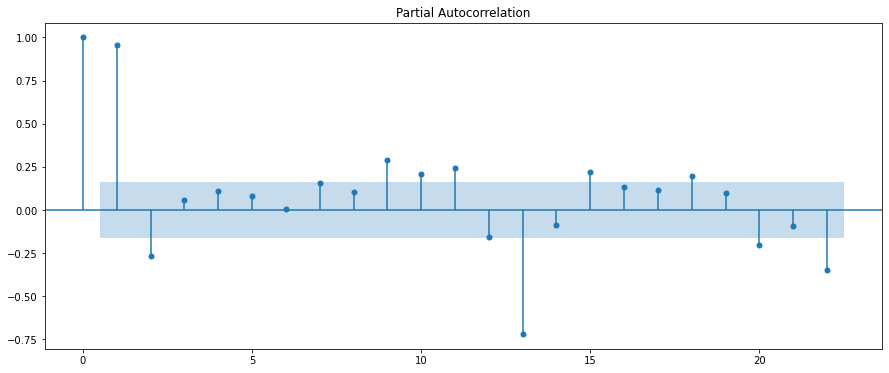

In [7]:
plot_pacf(data);

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
model = ARIMA(data, order=(2, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# order=(5, 1, 0) --> AIC: 1390.495
# order=(2, 1, 1) --> AIC: 1361.696 --> Melhor
# order=(2, 1, 0) --> AIC: 1397.975

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -694.988
Method:                       css-mle   S.D. of innovations             31.199
Date:                Fri, 30 Jul 2021   AIC                           1397.975
Time:                        18:46:56   BIC                           1409.827
Sample:                    02-01-1949   HQIC                          1402.791
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4075      3.064      0.786      0.432      -3.597       8.412
ar.L1.D.#Passengers     0.3792      0.082      4.605      0.000       0.218       0.541
ar.L2.D.#Passeng

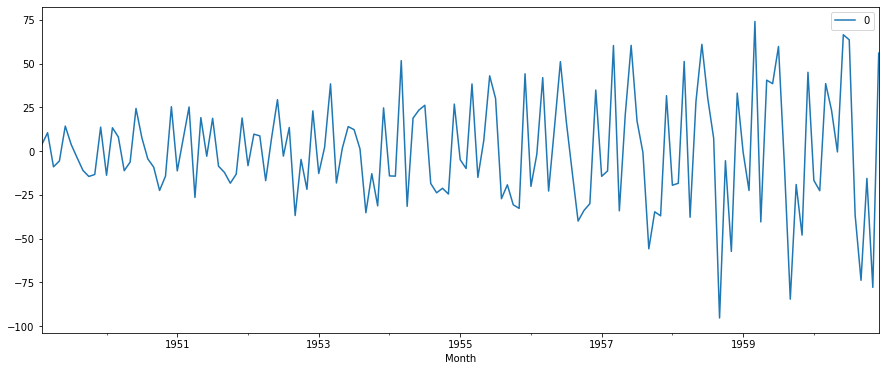

In [16]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

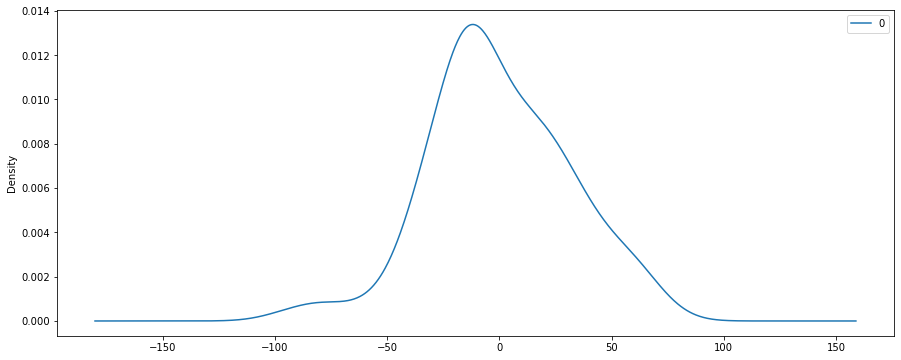

In [17]:
residuals.plot(kind='kde');

In [18]:
residuals.describe()

,0
count,143.000000
mean,0.016845
std,31.309377
min,-95.399552
25%,-18.811523
50%,-4.459774
75%,21.848529
max,74.096252


In [19]:
X = data.values

Previsto = 363.597703, Esperado = 340.000000
Previsto = 353.343231, Esperado = 318.000000
Previsto = 327.330400, Esperado = 362.000000
Previsto = 386.291421, Esperado = 348.000000
Previsto = 351.868852, Esperado = 363.000000
Previsto = 374.431901, Esperado = 435.000000
Previsto = 446.150619, Esperado = 491.000000
Previsto = 478.477210, Esperado = 505.000000
Previsto = 471.329979, Esperado = 404.000000
Previsto = 348.410866, Esperado = 359.000000
Previsto = 351.956996, Esperado = 310.000000
Previsto = 320.246328, Esperado = 337.000000
Previsto = 376.053347, Esperado = 360.000000
Previsto = 387.685142, Esperado = 342.000000
Previsto = 356.132893, Esperado = 406.000000
Previsto = 435.399702, Esperado = 396.000000
Previsto = 395.109411, Esperado = 420.000000
Previsto = 425.842375, Esperado = 472.000000
Previsto = 472.005473, Esperado = 548.000000
Previsto = 535.627601, Esperado = 559.000000
Previsto = 515.321112, Esperado = 463.000000
Previsto = 399.714104, Esperado = 407.000000
Previsto =

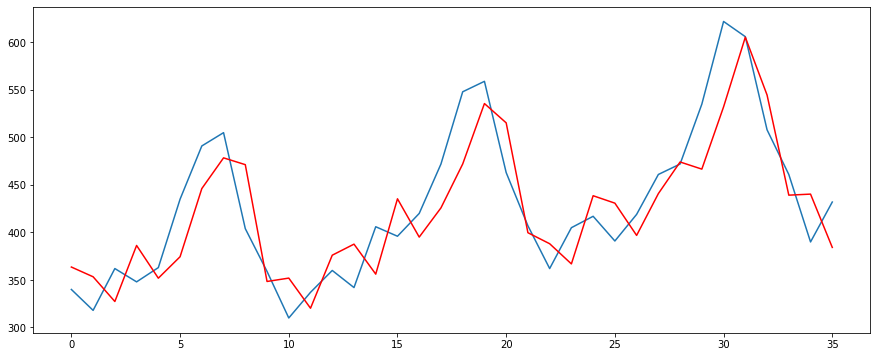

In [24]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Previsto = %f, Esperado = %f'%(yhat, obs))

print('')
plt.plot(test)
plt.plot(predictions, color='red');